<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Catherine Benavides
- Nombre de alumno 2: Fernanda Saavedra


### **Link de repositorio de GitHub:** https://github.com/FernandaSD/MDS7202


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 53.7 MB/s eta 0:00:00
  Attempting uninstall:

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [ ]:
df_retail = pd.read_pickle("/content/drive/MyDrive/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


A continuación se muestran las columnas del dataset y el tipo de variables que contienen.

In [ ]:
# Columnas
df_retail.dtypes

Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country                object
dtype: object

Por lo tanto, en el dataset se tienen las siguientes variables:

- Invoice: Variable de tipo categórica. Es un id de 6 dígitos que identifica a cada transacción.
- StockCode: Variable de tipo categórica. Corresponde al código del produto, el cual es un número de 5 dígitos único para cada producto.
- Description: Variable de tipo objeto. String con el nombre del producto.
- Quantity: Variable entera de tipo int64. Corresponde a la cantidad que se compra de un producto en cada transacción. 
- InvoiceDate: Variable de tipo fecha en formato datetime64[ns]. Corresponde a la fecha y hora en que se realizó la transacción.
- Price: Variable numérica de tipo float64. Corresponde al precio unitario del produto en libras esterlinas (£). 
- Customer ID: Variable de tipo categórica. Corresponde al id del cliente que realiza la compra. Es único por cliente.
- Country:  Variable de tipo objeto. String que indica el país en el que reside el cliente que realiza la compra. 

**Nota:** Para complementar la descripción de las columnas del dataset se utilizó el siguiente link https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci.

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariado y multivariado tiene el objetivo de eliminar datos que puedan ensuciar nuestro análisis. En el análisis univariado se analizan las variables por separado y en el multivariado se analizan en conjunto para poder detectar anomalías y datos infactibles. El análisis de datos faltantes se centra en estudiar las razones por la cual existen NA en una base para poder lidiar con estos de la mejor forma posible, ya sea eliminando filas, columnas, imputando datos, entre otros. 
Entre los beneficios encontramos: Mayor capacidad de generalización, eliminación de datos infactibles, maximización de datos disponibles, entre otros.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [ ]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [ ]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

De la función se puede ver una tabla con características descriptivas sobre los precios de los productos vendidos. De esta se destaca que existen 3 productos con precios negativos, lo cual es infactible; que hay 3687 productos de valor cero, lo que tampoco hace sentido; y que no hay valores faltantes.
Luego, se pueden ver histogramas del precio de los productos vendidos pre y post procesamiento de outliers. De estos gráficos se comenta que existen 2 productos con precios muy elevados que fueron eliminados tras el procesamiento de outliers. Además se comenta que el grueso de los productos tienen un precio menor a 10 libras esterlinas  y que siguen habiendo valores negativos tras el procesamiento de outliers que habría que tratar más adelante. 

In [ ]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

De la función se puede ver una tabla con características descriptivas sobre la cantidad de productos vendidos por transacción. De esta se destaca que existen 12326 órdenes con una cantidad negativa de productos enviados, lo cual es infactible; y que no hay valores faltantes. 
Luego, se pueden ver histogramas de la cantidad de productos vendidos pre y post procesamiento de outliers. De estos gráficos se comenta que existen 
múltiples órdenes con una cantidad muy elevada de productos. Tras el procesamiento de utliers se eliminaron las órdenes con cantidades de producto mayores a 100, y dos con cantidades negativas. Además se comenta que el grueso de las órdenes tienen tienen entre 0 y 13 productos y que siguen habiendo valores negativos tras el procesamiento de outliers que habría que tratar más adelante. 

In [ ]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

De la función se obtiene una tabla con características descriptivas donde se puede observar que el dataset contiene 28816 transacciones y que no hay valores faltantes. Por otra parte, del histograma se rescata que cada transacción está asociada a más de 200 productos distintos.

In [ ]:
profile_serie(df_retail['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

De la función se obtiene una tabla con características descriptivas donde se puede observar que el dataset contiene 4632 productos distintos y no hay valores faltantes. Por otra parte, del histograma se rescata que cada producto está asociado a más de 500 transacciones distintas.

In [ ]:
profile_serie(df_retail['Description']) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

De la función se obtiene una tabla con características descriptivas donde se puede observar que el dataset contiene 4682 nombres de productos distintos, lo que no coincide con la cantidad de códigos de producto que hay, por lo que eventualmente podría haber dos nombres distintos bajo un mismo código que habría que tratar más adelante. También se puede observar que no hay valores faltantes. Por otra parte, del histograma se rescata que cada producto está asociado a más de 500 transacciones distintas.

In [ ]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

De la función se obtiene una tabla con características descriptivas donde se puede observar que las transacciones van de Diciembre de 2009 a Diciembre de 2010, y que no hay datos faltantes. Del histograma se puede observar que los datos no siguen una distribución conocida.

In [ ]:
profile_serie(df_retail['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

De la función se obtiene una tabla con características descriptivas donde se puede observar que hay 4383 clientes, y que hay una cantidad considerable de datos faltantes. Por otra parte, del histograma se rescata que cada cliente está presente en más de 450 registros del dataset.

In [ ]:
profile_serie(df_retail['Country']) 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

De la función se obtiene una tabla con características descriptivas donde se puede observar que hay 40 países distintos de residencia de los clientes, y que no hay datos faltantes. Por otra parte, del histograma se rescata que la mayoría de clientes reside en el Reino Unido.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [ ]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

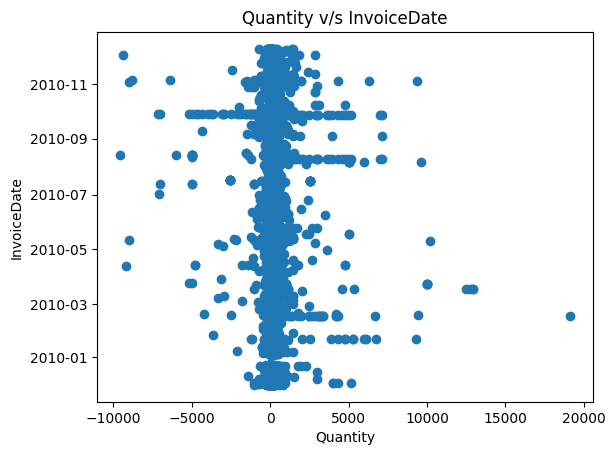

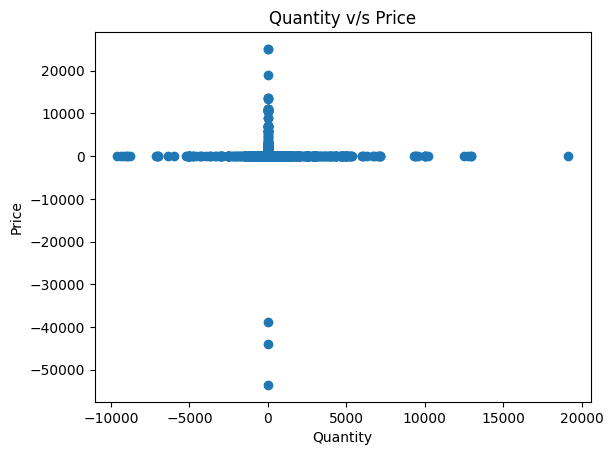

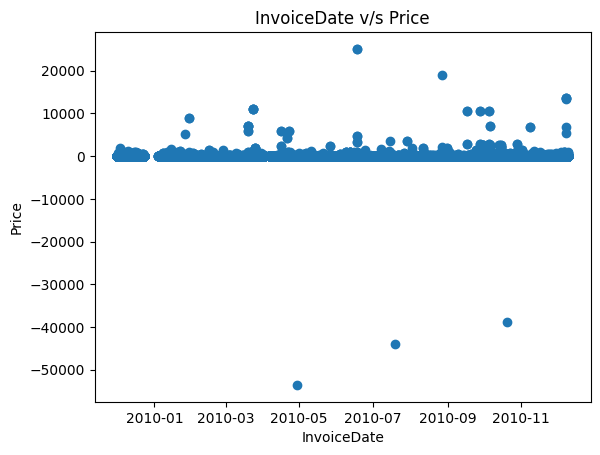

## Correlation:

## Missing Matrix:

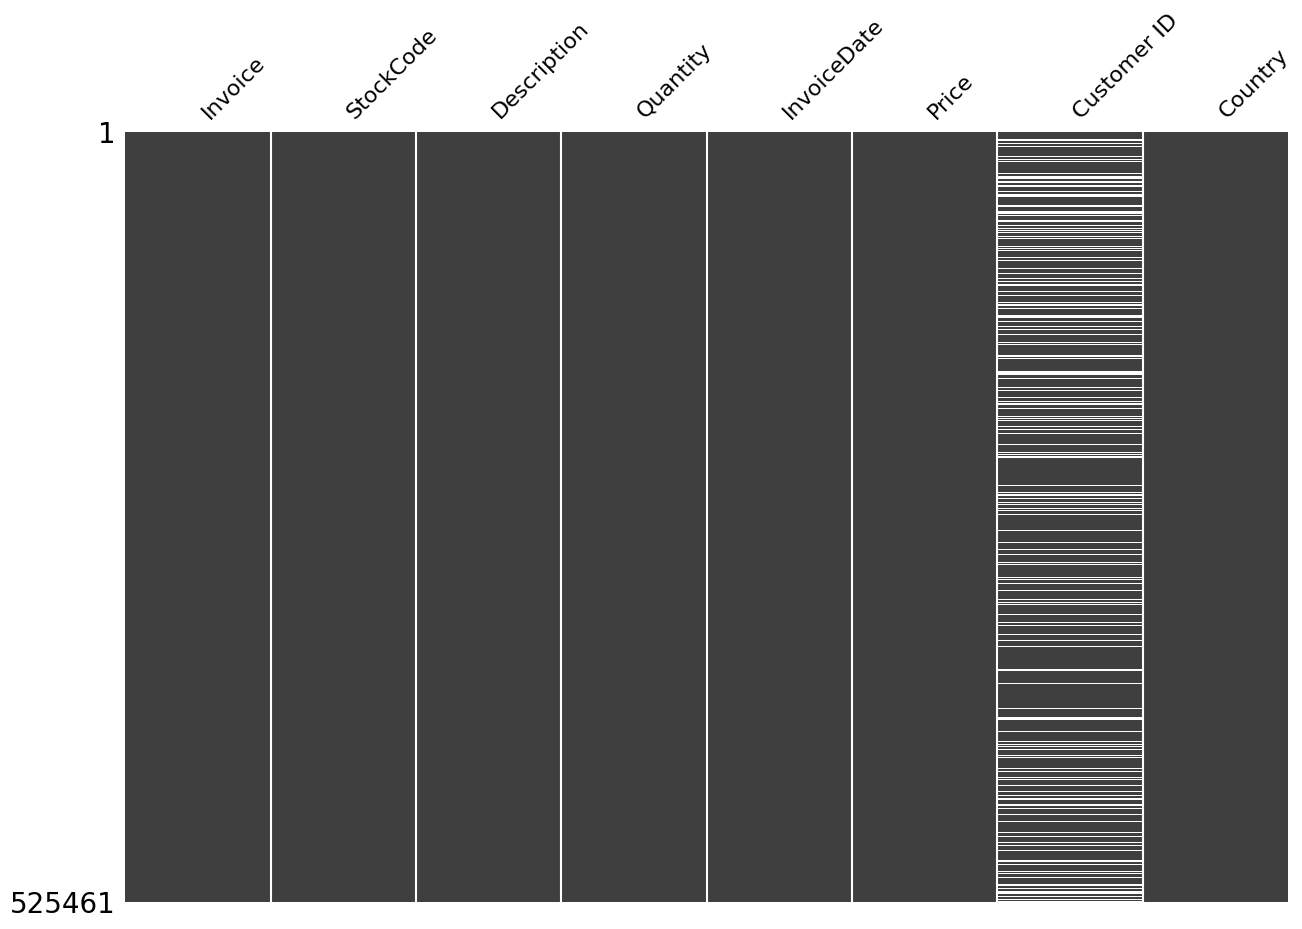

In [ ]:
profile_df(df_retail)

Del análisis multivariado se rescata que 'Customer ID' es la única variable con valores faltantes. Además, no hay correlación entre las variables numéricas. Por otra parte, de los scatter plot se tiene:

- Price vs Invoice Date: Se puede observar tres transacciones donde hay precios negativos; de las cuales una se realizó cerca de Mayo de 2010, otra a mediados de Julio de 2010 y la última a mediados de Octubre de 2010. No se observa una distribución clara para el precio en función de InvoiceDate, pero se destaca que los pedidos se concentran en productos de bajo precio y no muestra grandes variaciones a lo largo del tiempo.

- Quantity vs Price: Se observa que hay tres transacciones con productos de precio negativo, pero de los cuales la cantidad involucrada es cero. Y por otra parte, se tienen transacciones con cantidades de producto negativo, pero donde el precio es cero.

- Invoice Date vs Quantity: De este gráfico se observa que hay muchas transacciones con un cantidades de producto negativo (datos infactibles), los cuales habrá que eliminar de la base de datos. No se observa una distribución clara para la cantidad en función de InvoiceDate, pero se destaca que la cantidad de productos se concentra para pedidos de pocos datos pero no muestra grandes variaciones a lo largo del tiempo.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

Para realizar la limpieza se construirá una función en base a los puntos:

- Se quitarán registros con precios negativos ya que corresponden a una cantidad mínima del total de registros (0.0006%).
- Se quitarán los registros con precios ceros ya que, al igual que los valores negativos, corresponden a una cantidad mínima del total de registros (0.7%).
- Se quitarán los registros con cantidades negativas ya que corresponden a un mínimo del total de registros (2.35%).
- Se quitará la columna 'Customer ID' debido a que possee una gran cantidad de valores faltantes que a priori no pueden ser imputados (20.54 %).

In [ ]:
def limpieza(dataframe_in):
  # Se copia el dataframe
  df = dataframe_in.copy()

  # Se elimina la columna Customer ID
  df = df.drop(axis = 1, columns = 'Customer ID')

  # Se eliminan valores negativos
  df = df[df['Price'] > 0]
  df = df[df['Quantity'] > 0]

  return df

A continuación se aplica la función al dataset y se vuelve a realizar el análisis univariado y multivariado.

In [ ]:
df_retail_limpio = limpieza(df_retail)
df_retail_limpio.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom


In [ ]:
profile_serie(df_retail_limpio['Price']) 

## Price Profile

Type                            float64
Number of observations         511566.0
Mean                           4.252563
Std                           63.664629
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       61551.915238
Skew                           210.3689
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   510710
Duplicate rows (%)              99.83 %
Total size in memory      8185056 bytes
dtype: object

In [ ]:
profile_serie(df_retail_limpio['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         511566.0
Mean                           11.40015
Std                           86.761177
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       11849.646687
Skew                           88.67179
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   511425
Duplicate rows (%)              99.97 %
Total size in memory      8185056 bytes
dtype: object

In [ ]:
profile_serie(df_retail_limpio['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           511566
Unique                            20952
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   509446
Duplicate rows (%)              99.59 %
Total size in memory      6402996 bytes
dtype: object

In [ ]:
profile_serie(df_retail_limpio['StockCode'])

## StockCode Profile

Type                           category
Number of observations           511566
Unique                             4251
Top                              85123A
Freq                               3421
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   511395
Duplicate rows (%)              99.97 %
Total size in memory      5284852 bytes
dtype: object

In [ ]:
profile_serie(df_retail_limpio['Description'])

## Description Profile

Type                                                  object
Number of observations                                511566
Unique                                                  4534
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3455
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        511389
Duplicate rows (%)                                   99.97 %
Total size in memory                           8185056 bytes
dtype: object

In [ ]:
profile_serie(df_retail_limpio['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           511566
Mean                      2010-06-28 22:20:30.395491584
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 15:22:00
50%                                 2010-07-07 09:41:00
75%                                 2010-10-15 15:06:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   509777
Duplicate rows (%)                              99.65 %
Total size in memory                      8185056 bytes
dtype: object

In [ ]:
profile_serie(df_retail_limpio['Country'])

## Country Profile

Type                              object
Number of observations            511566
Unique                                40
Top                       United Kingdom
Freq                              473379
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    511566
Duplicate rows (%)               100.0 %
Total size in memory       8185056 bytes
dtype: object

## Bivariant Analysis:

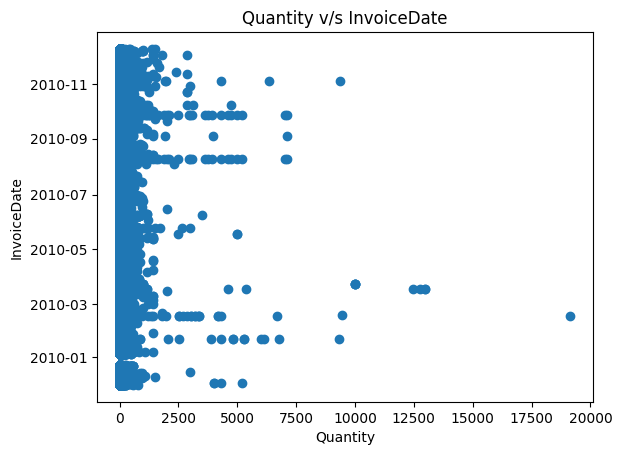

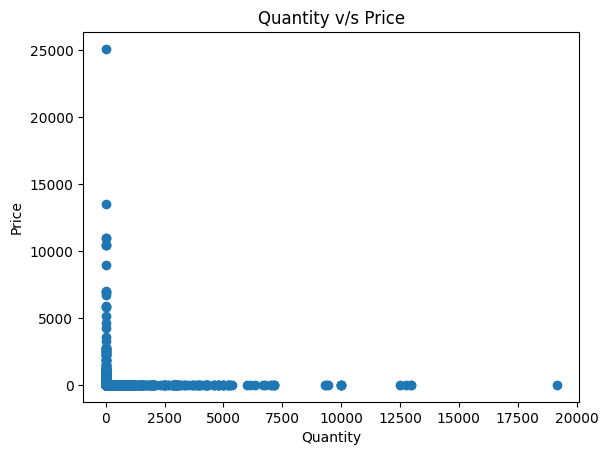

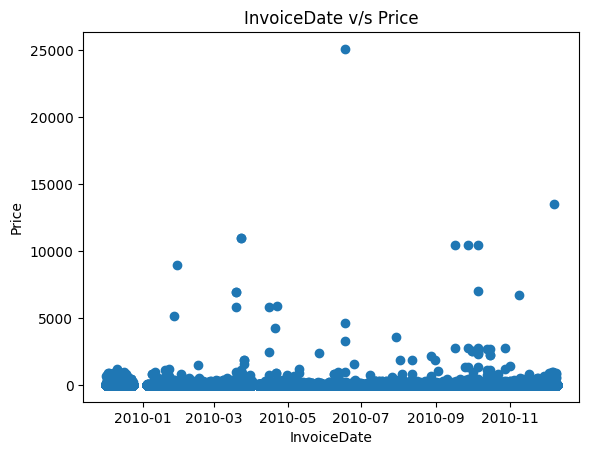

## Correlation:

## Missing Matrix:

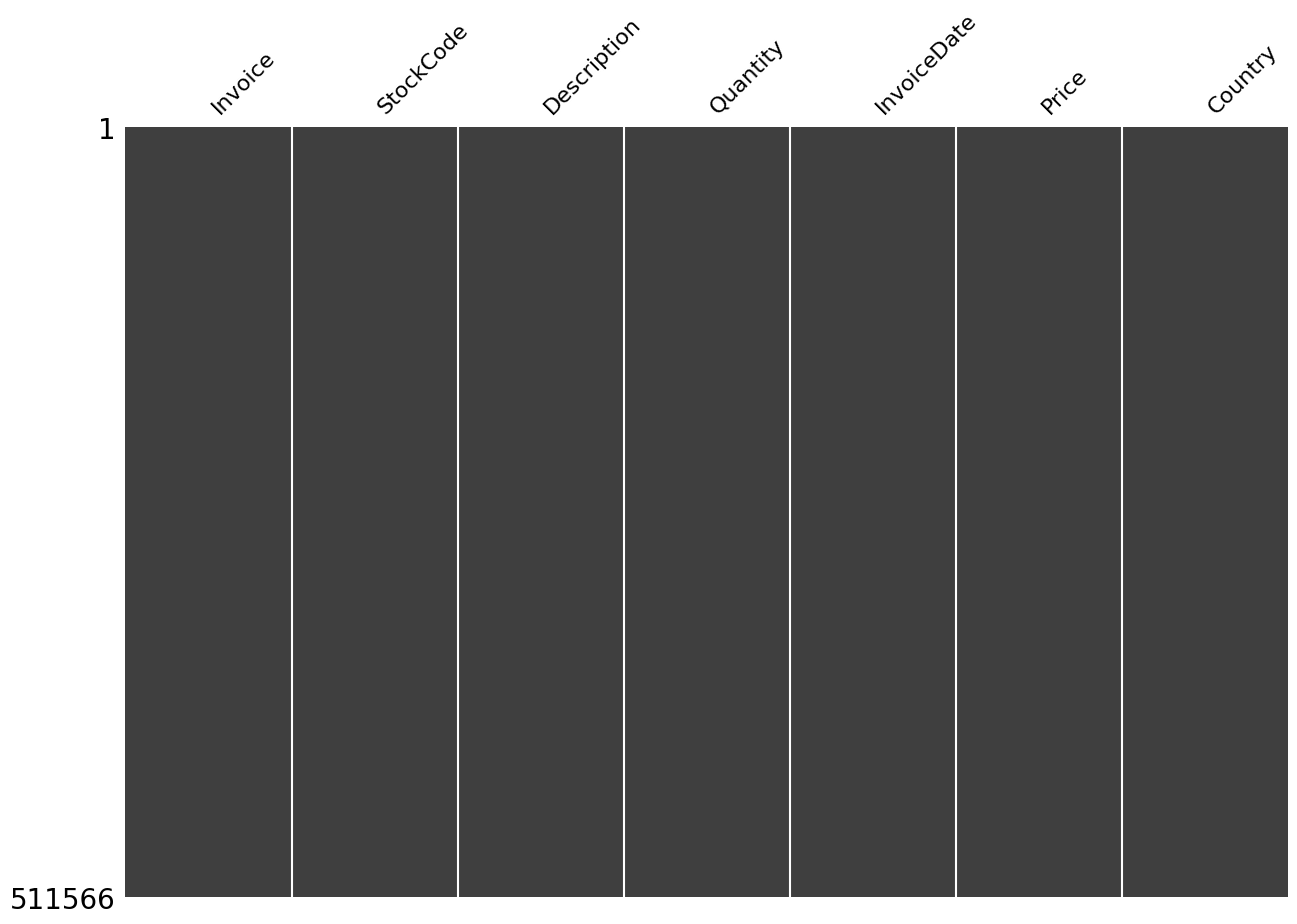

In [ ]:
profile_df(df_retail_limpio)

**Principales diferencias en el análisis exploratorio:**

**1. Análisis univariado**

- Eliminación de datos infactibles: Se eliminan del dataset transacciones con cantidades y/o precios negativos. Dado esto, se eliminaron outliers en estas variables, lo que permite visualizar mejor sus distribuciones.

- OBS: No se encuentran cambios visibles en las distribuciones de las siguientes variables: Invoice, StockCode, Description, InvoiceDate, Country. En la variable Description se destaca que cambia el orden de categorías 

- Eliminación de la variable customer id.


**2. Análisis multivariado**

De los gráficos del análisis multivariado se destaca que como ya no hay valores negativos para quantity ni price, es más facil encontrar relaciones en estos datos, los cuales se presenta a continuación.

- Quantity vs Invoice Date: el grueso de los pedidos tienen menos de 2500 productos.

- Quantity vs Price: Los pedidos con grandes cantidades de productos tienen un bajo precio, mientras que los pedidos de productos caros están compuestos por pocas unidades. 

- Para el gráfico Invoice Date vs Price no se aprecian grandes cambios y tampoco para el gráfico de correlación. 


### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

Primero se calculan los ingresos generados en cada transacción.

In [ ]:
# Ingresos
df_retail_limpio['Ingresos'] = df_retail_limpio['Quantity'] * df_retail_limpio['Price']
df_retail_limpio.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Ingresos
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,30.0


A continuación se agrupan las transacciones por producto para obtener la cantidad total del producto y el total de ingresos que genera, ordenados por el ingreso.

In [ ]:
# Total Ingresos por producto
df_top = df_retail_limpio[['Description', 'Quantity', 'Ingresos']].groupby(['Description']).sum()
df_top = df_top.sort_values(ascending = False, by = 'Ingresos')
df_top = df_top.reset_index()
df_top

,Description,Quantity,Ingresos
0,Manual,2831,262992.080
1,REGENCY CAKESTAND 3 TIER,13698,170078.510
2,WHITE HANGING HEART T-LIGHT HOLDER,58792,160630.780
3,DOTCOM POSTAGE,730,116408.710
4,ASSORTED COLOUR BIRD ORNAMENT,45348,73092.990
...,...,...,...
4529,"SILICON CUBE 25W, BLUE",1,0.420
4530,CHAMPAGNE TRAY BLANK CARD,2,0.380
4531,HAPPY BIRTHDAY GINGER CAT CARD,2,0.380
4532,PINK HEART CHRISTMAS DECORATION,1,0.380


Finalmente, se obtienen los primeros 30 productos de mayores ingresos y se grafican.

In [ ]:
# 30 productos de mayor ingreso
df_top = df_top.iloc[range(30)]
df_top

,Description,Quantity,Ingresos
0,Manual,2831,262992.08
1,REGENCY CAKESTAND 3 TIER,13698,170078.51
2,WHITE HANGING HEART T-LIGHT HOLDER,58792,160630.78
3,DOTCOM POSTAGE,730,116408.71
4,ASSORTED COLOUR BIRD ORNAMENT,45348,73092.99
5,PAPER CHAIN KIT 50'S CHRISTMAS,17226,58189.25
6,JUMBO BAG RED RETROSPOT,30805,56595.51
7,PARTY BUNTING,10083,49682.72
8,POSTAGE,2310,49477.54
9,ROTATING SILVER ANGELS T-LIGHT HLDR,23049,47985.09


In [ ]:
fig = px.bar(df_top, x="Ingresos", y="Description")
fig.update_layout(width=1000, height=1000, title = 'Ingresos')
fig.show()

Se puede observar que no necesariamente los productos más vendidos son los que generan las mayores ganancias, por ejemplo, el cuarto lugar tiene una cantidad vendida de 730 y el quinto 45348, una cantidad mucho mayor, pero aún así no supera las ganancias del cuarto. Además, se observa que el producto 'Manual' es el que genera los mayores ingresos.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
def plot_ventas(dataframe):
    # Se copia el dataframe
    df = dataframe.copy()

    # Variable fecha, sin la hora 
    df['Date'] = pd.to_datetime(df['InvoiceDate']).dt.date

    # Ventas Totales
    df_ventas = df[['Date', 'Quantity']].groupby(['Date']).sum()
    df_ventas = df_ventas.reset_index()

    # Gráfico
    fig = px.line(df_ventas, x="Date", y="Quantity")
    fig.update_layout(width=900, height=400, title = 'Ventas')
    fig.show()

In [ ]:
plot_ventas(df_retail_limpio)

Del gráfico se puede observar que la cantidad de productos vendidos a lo largo del tiempo tiene alta variablidad sin un patrón definido. Se desca que existen peaks en las ventas muy significativos, como las del 15 de febrero, 9 de agosto y 27 de septiembre.

# Conclusión

Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>